In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import Bloch, about, basis, mesolve, sesolve, sigmam, sigmax, sigmay, sigmaz

import matplotlib.pyplot as plt
# import matplotlib as mpl
# from matplotlib import cm

from qutip import *
from qutip.piqs import *

# import matplotlib.animation as animation
# from IPython.display import HTML
# from IPython.core.display import Image, display

%matplotlib inline

In [2]:
# Example of Schodinger equation

H = 2*np.pi * 0.1 * sigmax()
# H = rho0 = Qobj([[1,0],[0, 1]])
# psi0 = basis(2, 1)
times = np.linspace(0.0, 1.0, 2)



rho0 = Qobj([[1,3],[3, 2]])

result_0 = mesolve(H, rho0, times, options = Options(store_states=True))

In [3]:
result_0.states[0]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 3.]
 [3. 2.]]

In [5]:
print(H)
print(rho0)
commutator(H, rho0)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.         0.62831853]
 [0.62831853 0.        ]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 3.]
 [3. 2.]]


Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[ 0.          0.62831853]
 [-0.62831853  0.        ]]

In [6]:
rho1 = result_0.states[1]
print(rho0)
print(rho1)
print(1j*commutator(H, rho0))
print(rho1 - rho0)


Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 3.]
 [3. 2.]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1.34549473+0.j         3.        -0.47552968j]
 [3.        +0.47552968j 1.65450527+0.j        ]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j         0.+0.62831853j]
 [0.-0.62831853j 0.+0.j        ]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.34549473+0.j          0.        -0.47552968j]
 [ 0.        +0.47552968j -0.34549473+0.j        ]]


In [20]:
# Example of Lindblad Master Equation

times       = np.linspace(0.0, 10.0, 500)
H           = 2*np.pi * 0.1 * sigmax()
C           = [np.sqrt(0.05) * sigmax(), 0.1*sigmaz()]
Observable  = [sigmaz(), sigmay()]

psi0        = basis(2, 0)

rho0        = Qobj([[1,2],[2, 3]])


result_0 = mesolve(H, rho0, times, C, Observable, options = Options(store_states=True))


In [28]:
c = np.array([sigmaz().full(), sigmax().full()])
c
len(c)

2

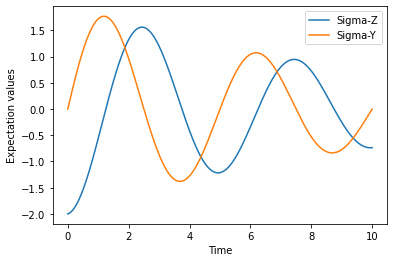

In [14]:
fig, ax = plt.subplots()
ax.plot(times, result_0.expect[0]) 
ax.plot(times, result_0.expect[1]) 
ax.set_xlabel('Time') 
ax.set_ylabel('Expectation values') 
ax.legend(("Sigma-Z", "Sigma-Y"))  
plt.show() 

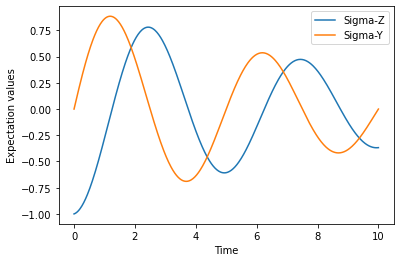

In [15]:
# Example of Lindblad Master Equation
psi0 = basis(2, 1)
result_1 = mesolve(H, psi0, times, C, E, options = Options(store_states=True))
fig, ax = plt.subplots()
ax.plot(times, result_1.expect[0]) 
ax.plot(times, result_1.expect[1]) 
ax.set_xlabel('Time') 
ax.set_ylabel('Expectation values') 
ax.legend(("Sigma-Z", "Sigma-Y"))  
plt.show() 

In [16]:
print(result_1.states[10])
print(result_0.states[10])

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.0253785+0.j         0.       -0.12211694j]
 [0.       +0.12211694j 0.9746215+0.j        ]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1.05075719+0.j         2.        -0.24423341j]
 [2.        +0.24423341j 2.94924281+0.j        ]]
